In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

from catboost import CatBoostClassifier

In [2]:
client_features_path = "data/patterns.csv"
transactions_path = "data/transactions.csv"

client_features = pd.read_csv(client_features_path, sep=';', encoding='cp1251')
transactions = pd.read_csv(transactions_path, sep=';', encoding='cp1251')

In [3]:
print("=== Client Features ===")
print(client_features.shape)
display(client_features.head(5))
display(client_features.columns)

print("\n=== Transactions ===")
print(transactions.shape)
display(transactions.head(5))
display(transactions.columns)

=== Client Features ===
(8588, 19)


,Дата совершенной транзакции,Уникальный идентификатор клиента,Количество разных версий ОС (os_ver) за последние 30 дней до transdate — сколько разных ОС/версий использовал клиент,Количество разных моделей телефона (phone_model) за последние 30 дней — насколько часто клиент “менял устройство” по логам,Модель телефона из самой последней сессии (по времени) перед transdate,Версия ОС из самой последней сессии перед transdate,Количество уникальных логин-сессий (минутных тайм-слотов) за последние 7 дней до transdate,Количество уникальных логин-сессий за последние 30 дней до transdate,Среднее число логинов в день за последние 7 дней: logins_last_7_days / 7,Среднее число логинов в день за последние 30 дней: logins_last_30_days / 30,"Относительное изменение частоты логинов за 7 дней к средней частоте за 30 дней:\n(freq7d?freq30d)/freq30d(freq_{7d} - freq_{30d}) / freq_{30d}(freq7d?freq30d)/freq30d — показывает, стал клиент заходить чаще или реже недавно",Доля логинов за 7 дней от логинов за 30 дней,Средний интервал (в секундах) между соседними сессиями за последние 30 дней,"Стандартное отклонение интервалов между логинами за 30 дней (в секундах), измеряет разброс интервалов","Дисперсия интервалов между логинами за 30 дней (в секундах?), ещё одна мера разброса","Экспоненциально взвешенное среднее интервалов между логинами за 7 дней, где более свежие сессии имеют больший вес (коэффициент затухания 0.3)",Показатель “взрывности” логинов: (std?mean)/(std+mean)(std - mean)/(std + mean)(std?mean)/(std+mean) для интервалов,Fano-factor интервалов: variance / mean,"Z-скор среднего интервала за последние 7 дней относительно среднего за 30 дней: насколько сильно недавние интервалы отличаются от типичных, в единицах стандартного отклонения"
0,transdate,cst_dim_id,monthly_os_changes,monthly_phone_model_changes,last_phone_model_categorical,last_os_categorical,logins_last_7_days,logins_last_30_days,login_frequency_7d,login_frequency_30d,freq_change_7d_vs_mean,logins_7d_over_30d_ratio,avg_login_interval_30d,std_login_interval_30d,var_login_interval_30d,ewm_login_interval_7d,burstiness_login_interval,fano_factor_login_interval,zscore_avg_login_interval_7d
1,'2025-03-05 00:00:00.000',453024373,2,2,Vivo V2116,Android/13,6,20,0.8571428571428571,0.6666666666666666,0.2857142857142857,0.3,131460.0,213919.47830901234,45761543200,23007.164409515124,0.23875037020941794,348102.41290126275,-0.22107383756651397
2,'2025-05-19 00:00:00.000',498636442,1,1,Xiaomi_m2006c3mg,Android/10,2,22,0.2857142857142857,0.7333333333333333,-0.6103896103896104,0.09090909090909091,101520.0,82733.72644157334,6844869490.909091,178980.0,-0.101958717043282,67423.85235332044,0.9362566311418639
3,'2025-08-04 00:00:00.000',2934905461,1,1,"iPhone16,1",iOS/18.5,2,2,0.2857142857142857,0.06666666666666667,3.2857142857142856,1.0,67800.0,-1.0,-1.0,67800.0,-1.0,-1.0,-1.0
4,'2025-03-05 00:00:00.000',456173125,1,2,Vivo V2058,Android/13,5,37,0.7142857142857143,1.2333333333333334,-0.42084942084942084,0.13513513513513514,61394.59459459459,76777.32139819076,5894757081.081081,9400.733944954127,0.11133034302281353,96014.26835710513,-0.5087386989189104


Index(['Дата совершенной транзакции', 'Уникальный идентификатор клиента',
       'Количество разных версий ОС (os_ver) за последние 30 дней до transdate — сколько разных ОС/версий использовал клиент',
       'Количество разных моделей телефона (phone_model) за последние 30 дней — насколько часто клиент “менял устройство” по логам',
       'Модель телефона из самой последней сессии (по времени) перед transdate',
       'Версия ОС из самой последней сессии перед transdate',
       'Количество уникальных логин-сессий (минутных тайм-слотов) за последние 7 дней до transdate',
       'Количество уникальных логин-сессий за последние 30 дней до transdate',
       'Среднее число логинов в день за последние 7 дней: logins_last_7_days / 7',
       'Среднее число логинов в день за последние 30 дней: logins_last_30_days / 30',
       'Относительное изменение частоты логинов за 7 дней к средней частоте за 30 дней:\n(freq7d?freq30d)/freq30d(freq_{7d} - freq_{30d}) / freq_{30d}(freq7d?freq30d)/freq30d


=== Transactions ===
(13114, 7)


,Уникальный идентификатор клиента,Дата совершенной транзакции,Дата и время совершенной транзакции,Сумма совершенного перевода,Уникальный идентификатор транзакции,Зашифрованный идентификатор получателя/destination транзакции,"Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая"
0,cst_dim_id,transdate,transdatetime,amount,docno,direction,target
1,2937833270,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0
2,2096229005,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0
3,2937759666,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0
4,2933493153,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0


Index(['Уникальный идентификатор клиента', 'Дата совершенной транзакции',
       'Дата и время совершенной транзакции', 'Сумма совершенного перевода',
       'Уникальный идентификатор транзакции',
       'Зашифрованный идентификатор получателя/destination транзакции',
       'Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая'],
      dtype='object')

In [4]:
transactions.columns = transactions.columns.str.strip()
client_features.columns = client_features.columns.str.strip()

transactions.rename(columns={
    'Уникальный идентификатор клиента': 'client_id',
    'Сумма совершенного перевода': 'amount',
    'Уникальный идентификатор транзакции': 'transaction_id',
    'Зашифрованный идентификатор получателя/destination транзакции': 'destination_id',
    'Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая': 'is_fraud',
    'Дата совершенной транзакции': 'trans_date',
    'Дата и время совершенной транзакции': 'trans_datetime'
}, inplace=True)

client_features.rename(columns={
    'Дата совершенной транзакции': 'trans_date',
    'Уникальный идентификатор клиента': 'client_id',
    'Количество разных версий ОС (os_ver) за последние 30 дней до transdate — сколько разных ОС/версий использовал клиент': 'os_ver_count_30d',
    'Количество разных моделей телефона (phone_model) за последние 30 дней — насколько часто клиент “менял устройство” по логам': 'phone_model_count_30d',
    'Модель телефона из самой последней сессии (по времени) перед transdate': 'phone_model_last',
    'Версия ОС из самой последней сессии перед transdate': 'os_ver_last',
    'Количество уникальных логин-сессий (минутных тайм-слотов) за последние 7 дней до transdate': 'logins_7d',
    'Количество уникальных логин-сессий за последние 30 дней до transdate': 'logins_30d',
    'Среднее число логинов в день за последние 7 дней: logins_last_7_days / 7': 'logins_per_day_7',
    'Среднее число логинов в день за последние 30 дней: logins_last_30_days / 30': 'logins_per_day_30',
    'Относительное изменение частоты логинов за 7 дней к средней частоте за 30 дней:\n(freq7d?freq30d)/freq30d(freq_{7d} - freq_{30d}) / freq_{30d}(freq7d?freq30d)/freq30d — показывает, стал клиент заходить чаще или реже недавно': 'rel_change_7_vs_30',
    'Доля логинов за 7 дней от логинов за 30 дней': 'share_7_of_30',
    'Средний интервал (в секундах) между соседними сессиями за последние 30 дней': 'mean_interval_30d',
    'Стандартное отклонение интервалов между логинами за 30 дней (в секундах), измеряет разброс интервалов': 'std_interval_30d',
    'Дисперсия интервалов между логинами за 30 дней (в секундах?), ещё одна мера разброса': 'var_interval_30d',
    'Экспоненциально взвешенное среднее интервалов между логинами за 7 дней, где более свежие сессии имеют больший вес (коэффициент затухания 0.3)': 'ewm_interval_7d',
    'Показатель “взрывности” логинов: (std?mean)/(std+mean)(std - mean)/(std + mean)(std?mean)/(std+mean) для интервалов': 'burstiness',
    'Fano-factor интервалов: variance / mean': 'fano_factor',
    'Z-скор среднего интервала за последние 7 дней относительно среднего за 30 дней: насколько сильно недавние интервалы отличаются от типичных, в единицах стандартного отклонения': 'z_score_7d_vs_30d'
}, inplace=True)

print("Транзакции:")
print(transactions.columns)
print("\nПаттерны клиента:")
print(client_features.columns)


Транзакции:
Index(['client_id', 'trans_date', 'trans_datetime', 'amount', 'transaction_id',
       'destination_id', 'is_fraud'],
      dtype='object')

Паттерны клиента:
Index(['trans_date', 'client_id', 'os_ver_count_30d', 'phone_model_count_30d',
       'phone_model_last', 'os_ver_last', 'logins_7d', 'logins_30d',
       'logins_per_day_7', 'logins_per_day_30', 'rel_change_7_vs_30',
       'share_7_of_30', 'mean_interval_30d', 'std_interval_30d',
       'var_interval_30d', 'ewm_interval_7d', 'burstiness', 'fano_factor',
       'z_score_7d_vs_30d'],
      dtype='object')


In [5]:
print("Транзакции:")
display(transactions.info())
print(transactions.isnull().sum())

print("\nПаттерны клиента:")
display(client_features.info())
print(client_features.isnull().sum())

Транзакции:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13114 entries, 0 to 13113
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   client_id       13108 non-null  object
 1   trans_date      13114 non-null  object
 2   trans_datetime  13114 non-null  object
 3   amount          13114 non-null  object
 4   transaction_id  13114 non-null  object
 5   destination_id  13114 non-null  object
 6   is_fraud        13114 non-null  object
dtypes: object(7)
memory usage: 717.3+ KB


None

client_id         6
trans_date        0
trans_datetime    0
amount            0
transaction_id    0
destination_id    0
is_fraud          0
dtype: int64

Паттерны клиента:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8588 entries, 0 to 8587
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   trans_date             8588 non-null   object
 1   client_id              8580 non-null   object
 2   os_ver_count_30d       8588 non-null   object
 3   phone_model_count_30d  8588 non-null   object
 4   phone_model_last       8582 non-null   object
 5   os_ver_last            8582 non-null   object
 6   logins_7d              8588 non-null   object
 7   logins_30d             8588 non-null   object
 8   logins_per_day_7       8588 non-null   object
 9   logins_per_day_30      8588 non-null   object
 10  rel_change_7_vs_30     8563 non-null   object
 11  share_7_of_30          8563 non-null   object
 12  me

None

trans_date                0
client_id                 8
os_ver_count_30d          0
phone_model_count_30d     0
phone_model_last          6
os_ver_last               6
logins_7d                 0
logins_30d                0
logins_per_day_7          0
logins_per_day_30         0
rel_change_7_vs_30       25
share_7_of_30            25
mean_interval_30d         0
std_interval_30d          0
var_interval_30d          0
ewm_interval_7d           0
burstiness                0
fano_factor               0
z_score_7d_vs_30d         0
dtype: int64


In [6]:
transactions['client_id'] = (
    transactions['client_id']
        .astype(str)
        .str.replace("'", "")
        .str.replace(" ", "")
        .str.extract(r'(\d+)')  # оставляем только цифры
)
transactions['client_id'] = pd.to_numeric(transactions['client_id'], errors='coerce')
transactions = transactions.dropna(subset=['client_id'])
transactions['client_id'] = transactions['client_id'].astype('int64')

transactions['trans_date'] = (
    transactions['trans_date']
        .astype(str)
        .str.replace("'", "")
        .str.slice(0, 10)
)
transactions['trans_date'] = pd.to_datetime(transactions['trans_date'], errors='coerce')
transactions = transactions.dropna(subset=['trans_date'])

transactions['is_fraud'] = pd.to_numeric(transactions['is_fraud'], errors='coerce').fillna(0).astype(int)

client_features['client_id'] = (
    client_features['client_id']
        .astype(str)
        .str.replace("'", "")
        .str.replace(" ", "")
        .str.extract(r'(\d+)')
)
client_features['client_id'] = pd.to_numeric(client_features['client_id'], errors='coerce')
client_features = client_features.dropna(subset=['client_id'])
client_features['client_id'] = client_features['client_id'].astype('int64')

client_features['trans_date'] = (
    client_features['trans_date']
        .astype(str)
        .str.replace("'", "")
        .str.slice(0, 10)
)
client_features['trans_date'] = pd.to_datetime(client_features['trans_date'], errors='coerce')
client_features = client_features.dropna(subset=['trans_date'])

for col in client_features.columns:
    if col in ['client_id', 'trans_date']:
        continue
    client_features[col] = pd.to_numeric(client_features[col], errors='coerce')

merged = transactions.merge(
    client_features,
    on=['client_id', 'trans_date'],
    how='left'
)

print("Размер объединенного датасета:", merged.shape)
merged.head()

Размер объединенного датасета: (13126, 24)


,client_id,trans_date,trans_datetime,amount,transaction_id,destination_id,is_fraud,os_ver_count_30d,phone_model_count_30d,phone_model_last,...,logins_per_day_30,rel_change_7_vs_30,share_7_of_30,mean_interval_30d,std_interval_30d,var_interval_30d,ewm_interval_7d,burstiness,fano_factor,z_score_7d_vs_30d
0,2937833270,2025-01-05,'2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0,1.0,1.0,NaN,...,1.533333,0.211180,0.282609,49814.117647,106759.606690,1.139761e+10,18227.846189,0.363698,228802.880771,-0.213134
1,2096229005,2025-03-04,'2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0,1.0,1.0,NaN,...,1.766667,-0.110512,0.207547,50667.857143,78912.726908,6.227218e+09,6872.638130,0.217971,122902.739907,0.026791
2,2937759666,2025-06-20,'2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2933493153,2025-07-06,'2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0,0.0,0.0,NaN,...,0.000000,NaN,NaN,1350.000000,1824.335495,3.328200e+06,-1.000000,0.149428,2465.333333,-1.000000
4,456000634,2024-12-18,'2024-12-18 14:12:25.000',20000.0,7128,87b698d1edae13c21ce86678de3b8546,0,1.0,1.0,NaN,...,0.433333,1.307692,0.538462,213360.000000,425545.970020,NaN,127828.033176,0.332108,848750.340270,-0.408581


In [7]:
missing_counts = merged.isna().sum()
print("Пропуски по колонкам:")
print(missing_counts[missing_counts > 0])  # выводим только колонки с пропусками

missing_percent = (merged.isna().sum() / len(merged) * 100).round(2)
print("\nПроцент пропусков по колонкам:")
print(missing_percent[missing_percent > 0])


Пропуски по колонкам:
os_ver_count_30d           378
phone_model_count_30d      378
phone_model_last         13126
os_ver_last              13126
logins_7d                  378
logins_30d                 378
logins_per_day_7           378
logins_per_day_30         2353
rel_change_7_vs_30         420
share_7_of_30              417
mean_interval_30d          378
std_interval_30d           378
var_interval_30d           907
ewm_interval_7d            378
burstiness                 378
fano_factor                378
z_score_7d_vs_30d          378
dtype: int64

Процент пропусков по колонкам:
os_ver_count_30d           2.88
phone_model_count_30d      2.88
phone_model_last         100.00
os_ver_last              100.00
logins_7d                  2.88
logins_30d                 2.88
logins_per_day_7           2.88
logins_per_day_30         17.93
rel_change_7_vs_30         3.20
share_7_of_30              3.18
mean_interval_30d          2.88
std_interval_30d           2.88
var_interval_30d      

In [8]:
df = merged.copy()   

y = df["is_fraud"]

features_to_drop = [
    "is_fraud",
    "transaction_id",
    "client_id",
    "destination_id",
    "trans_datetime",
    "trans_date",
    "phone_model_last",
    "os_ver_last"
]

X = df.drop(columns=features_to_drop)

print("Columns:", X.columns)
print("X shape:", X.shape)
print("y shape:", y.shape)


Columns: Index(['amount', 'os_ver_count_30d', 'phone_model_count_30d', 'logins_7d',
       'logins_30d', 'logins_per_day_7', 'logins_per_day_30',
       'rel_change_7_vs_30', 'share_7_of_30', 'mean_interval_30d',
       'std_interval_30d', 'var_interval_30d', 'ewm_interval_7d', 'burstiness',
       'fano_factor', 'z_score_7d_vs_30d'],
      dtype='object')
X shape: (13126, 16)
y shape: (13126,)


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# 1. Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 2. Импьютер для пропусков
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 3. Oversampling только на train
sm = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. Вес классов
cw = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train_res
)
class_weights = {0: cw[0], 1: cw[1]}

# 5. Масштабирование
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [10]:
import os
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Создаём папки, если их нет
os.makedirs("trained_model", exist_ok=True)
os.makedirs("data", exist_ok=True)

models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, class_weight=class_weights, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=300, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=300, class_weight='balanced', random_state=42)
}

results = []

for name, model in models.items():
    # Обучение модели
    model.fit(X_train_res, y_train_res)
    
    # Сохраняем модель
    joblib.dump(model, f"trained_model/{name}_fraud_model.pkl")
    
    # Предсказания на тесте
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Метрики
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC-AUC": roc_auc
    })

# Сохраняем метрики в CSV в папку data
results_df = pd.DataFrame(results)
results_df.to_csv("data/fraud_models_metrics.csv", index=False)
print(results_df)

# Сохраняем импьютер и скейлер для будущего использования
joblib.dump(imputer, "trained_model/imputer.pkl")
joblib.dump(scaler, "trained_model/scaler.pkl")


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [09:41:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 907, number of negative: 9073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3699
[LightGBM] [Info] Number of data points in the train set: 9980, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
                Model  Accuracy  Precision  Recall        F1   ROC-AUC
0  LogisticRegression  0.862621   0.051188    0.56  0.093802  0.744820
1        RandomForest  0.986034   0.400000    0.20  0.266667  0.818367
2    GradientBoosting  0.985272   0.346154    0.18  0.236842  0.856453
3             XGBoost  0.985272   0.366667    0.22  0.275000  0.834226
4            LightGBM  0.984764   0.375000    0.30  0.333333  0.824949


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


['trained_model/scaler.pkl']

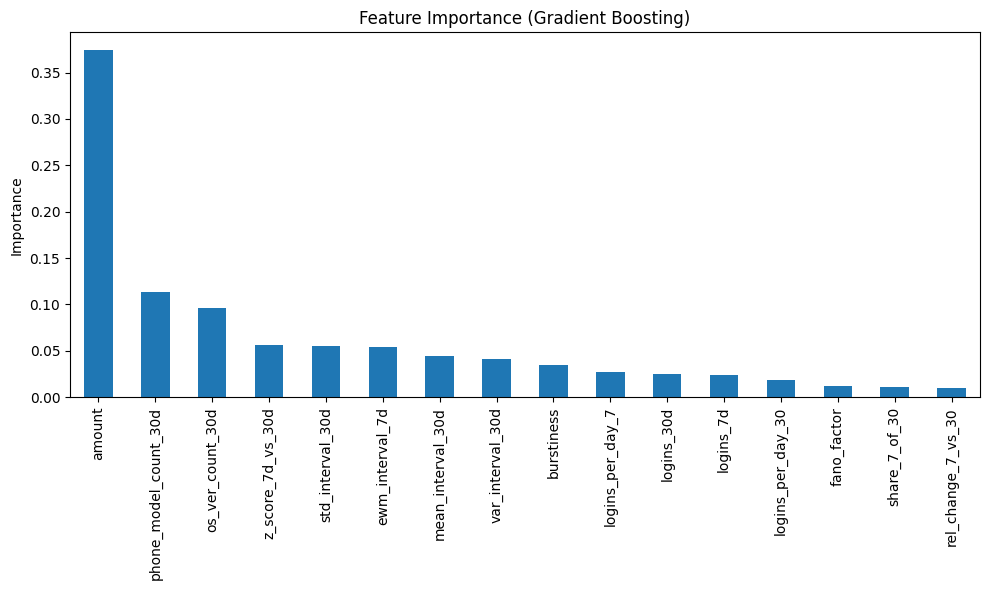

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

model = joblib.load("trained_model/GradientBoosting_fraud_model.pkl")

gb_model = model 

feature_importance = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.ylabel("Importance")
plt.title("Feature Importance (Gradient Boosting)")
plt.tight_layout()
plt.show()

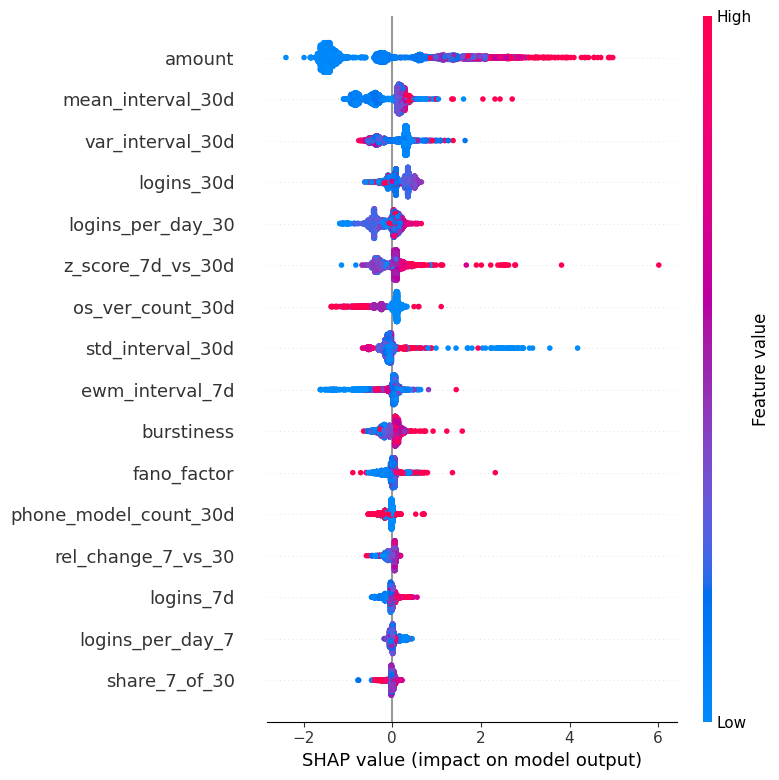

In [ ]:
import shap
import joblib
import pandas as pd

model = joblib.load("trained_model/GradientBoosting_fraud_model.pkl")
gb_model = model

feature_names = X.columns    

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test_scaled_df)

shap.summary_plot(shap_values, X_test_scaled_df, plot_type="dot")


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


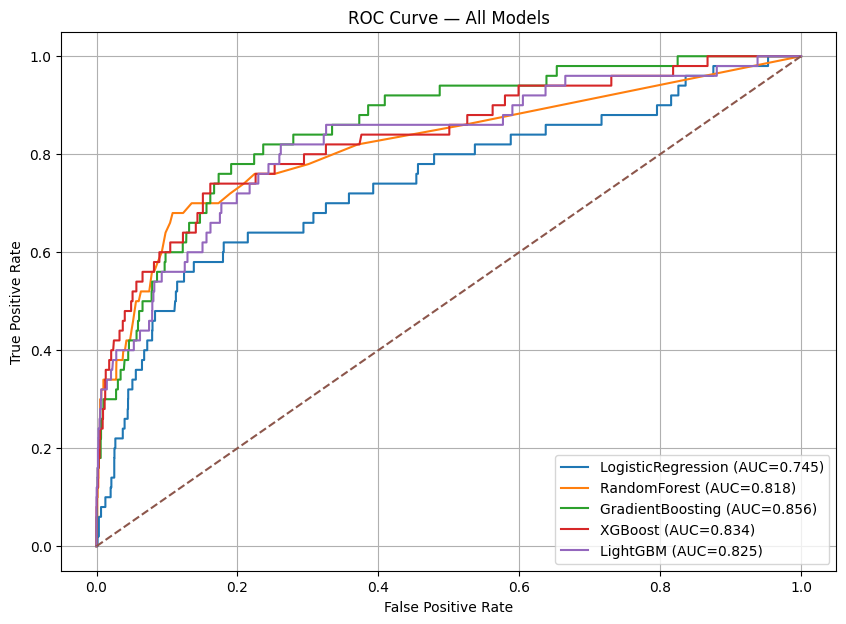

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

models = ["LogisticRegression", "RandomForest", "GradientBoosting", "XGBoost", "LightGBM"]

plt.figure(figsize=(10, 7))

for name in models:
    model = joblib.load(f"trained_model/{name}_fraud_model.pkl")
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — All Models")
plt.legend()
plt.grid(True)
plt.show()
